In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',25)
pd.set_option('display.max_rows',300)
plt.rcParams['axes.facecolor']='#99ffcc'
import warnings
warnings.filterwarnings('ignore')

In [314]:
sales=pd.read_csv('/kaggle/input/cognizant-artificial-intelligence/data for modeling/sales.csv')
#sensor stock levels
ssl=pd.read_csv('/kaggle/input/cognizant-artificial-intelligence/data for modeling/sensor_stock_levels.csv')
#sensor storage temperature
sst=pd.read_csv('/kaggle/input/cognizant-artificial-intelligence/data for modeling/sensor_storage_temperature.csv')

In [315]:
sales.sample(4)

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
6094,6094,b65d8068-c17b-48de-9177-198dcf19ea5a,2022-03-01 17:39:21,caf41d5d-31a4-4a6d-aa2f-1bb00d9f8923,snacks,standard,0.19,4,0.76,cash
4410,4410,0d291982-e002-41b4-ab52-e90e0562a1b5,2022-03-02 18:13:51,46867178-bebf-45ef-a894-5fd012d4cd4d,dairy,premium,9.49,3,28.47,debit card
3674,3674,1d98f9de-c581-43c8-a0a2-f417d81fd026,2022-03-02 13:55:31,d8c45766-c665-47e4-9868-b634255e5b43,condiments and sauces,non-member,9.19,4,36.76,debit card
115,115,b6d50ddc-e24b-4259-b575-7e94fbfbb7ef,2022-03-07 11:09:59,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,non-member,0.19,1,0.19,cash


In [316]:
ssl.head()
#['id', 'timestamp', 'product_id', 'estimated_stock_pct']

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [317]:
sst.head()
#['id', 'timestamp', 'temperature']

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [318]:
m1=pd.merge(sales,ssl,on=['product_id'])
m1.sample(5)
#['id', 'timestamp', 'product_id', 'estimated_stock_pct']

,Unnamed: 0_x,transaction_id,timestamp_x,product_id,category,customer_type,unit_price,quantity,total,payment_type,Unnamed: 0_y,id,timestamp_y,estimated_stock_pct
416156,7443,8518c45a-3e47-462c-a8f6-ba8296b0495c,2022-03-05 09:29:56,1dbe2caf-d1ed-486d-be49-13697c170a30,kitchen,gold,18.49,2,36.98,e-wallet,7212,49185072-6f31-4fab-af09-8ea76bd3043c,2022-03-07 16:09:58,0.95
150189,2279,063463f9-cca6-451d-8a7d-fc3ddc297936,2022-03-01 13:07:04,54b479bb-7e7a-4e63-8bef-1a1e17fefd1f,frozen,premium,8.19,3,24.57,e-wallet,2578,093304ec-dcc9-4fdb-a414-cd4fc63fee8b,2022-03-06 15:28:39,0.41
313650,5583,3129ae02-d57d-4a77-9851-ccc9532e6e06,2022-03-05 09:08:52,e210b4dd-ae57-4327-a6fb-1ab0ab8f60a2,baked goods,premium,8.49,2,16.98,credit card,10694,eb16a522-f103-4839-8a75-4a5e046caf46,2022-03-03 09:51:03,0.31
274148,4517,a95d517b-4130-4e47-b2c0-9fa9dddfca48,2022-03-05 10:53:19,9708cf5b-aa69-4320-a013-9d234c40e63f,cheese,non-member,13.99,1,13.99,debit card,6991,71371c40-383b-48be-aa59-06306d4ab2f9,2022-03-01 09:12:14,0.29
261540,4578,0cb5f8cb-0aeb-4718-a1e8-15d0c6df711b,2022-03-07 10:00:08,add047b6-5946-49ff-8d86-17c0a7bfb763,cheese,gold,6.49,1,6.49,debit card,9884,c5400c7f-08aa-4dc8-bd47-b59e825a3cc3,2022-03-06 19:44:28,0.19


In [319]:
sst.columns=['Unnamed: 0', 'id', 'timestamp_x', 'temperature']

In [320]:
fdf=pd.merge(m1,sst,on='timestamp_x')
fdf.head()

,Unnamed: 0_x,transaction_id,timestamp_x,product_id,category,customer_type,unit_price,quantity,total,payment_type,Unnamed: 0_y,id_x,timestamp_y,estimated_stock_pct,Unnamed: 0,id_y,temperature
0,5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,164,5540da96-885e-4d17-aa33-5720ca9b57d5,2022-03-03 09:16:02,0.25,15854,38808b9d-712c-4703-a5ae-920817960fa6,-2.84
1,5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,172,e65514e8-2935-4921-baf8-2a9cf849a7f2,2022-03-04 17:52:19,0.23,15854,38808b9d-712c-4703-a5ae-920817960fa6,-2.84
2,5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,242,1faae309-bd2c-412c-b988-42e3086e2e86,2022-03-07 12:44:46,0.80,15854,38808b9d-712c-4703-a5ae-920817960fa6,-2.84
3,5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,343,d383beb7-6dd0-46b3-aaa3-a1141e0c94dd,2022-03-02 17:36:38,0.79,15854,38808b9d-712c-4703-a5ae-920817960fa6,-2.84
4,5,b5b3c8b9-f496-484d-aa30-4f2efb5ed56c,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,465,9c0d4cbe-c00d-42c2-8489-263188ae0b17,2022-03-07 09:44:25,0.86,15854,38808b9d-712c-4703-a5ae-920817960fa6,-2.84


In [321]:
dr=['transaction_id','Unnamed: 0_x', 'id_x','Unnamed: 0_y', 'id_y','timestamp_y','Unnamed: 0']
fdf.drop(columns=dr,inplace=True,axis=1)

In [322]:
fdf

,timestamp_x,product_id,category,customer_type,unit_price,quantity,total,payment_type,estimated_stock_pct,temperature
0,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.25,-2.84
1,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.23,-2.84
2,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.80,-2.84
3,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.79,-2.84
4,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.86,-2.84
...,...,...,...,...,...,...,...,...,...,...
38937,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.43,-1.33
38938,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.67,-1.33
38939,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.92,-1.33
38940,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.21,-1.33


In [323]:
fdf.columns=['timestamp', 'prd_id', 'category', 'customer_type', 'unit_price',
       'quantity', 'total', 'payment_type', 'avg_stk_prc',
       'temperature']

In [324]:
fdf

,timestamp,prd_id,category,customer_type,unit_price,quantity,total,payment_type,avg_stk_prc,temperature
0,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.25,-2.84
1,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.23,-2.84
2,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.80,-2.84
3,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.79,-2.84
4,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.86,-2.84
...,...,...,...,...,...,...,...,...,...,...
38937,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.43,-1.33
38938,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.67,-1.33
38939,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.92,-1.33
38940,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.21,-1.33


In [325]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38942 entries, 0 to 38941
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      38942 non-null  object 
 1   prd_id         38942 non-null  object 
 2   category       38942 non-null  object 
 3   customer_type  38942 non-null  object 
 4   unit_price     38942 non-null  float64
 5   quantity       38942 non-null  int64  
 6   total          38942 non-null  float64
 7   payment_type   38942 non-null  object 
 8   avg_stk_prc    38942 non-null  float64
 9   temperature    38942 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 3.0+ MB


In [326]:
fdf['timestamp']=pd.to_datetime(fdf['timestamp'])
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38942 entries, 0 to 38941
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      38942 non-null  datetime64[ns]
 1   prd_id         38942 non-null  object        
 2   category       38942 non-null  object        
 3   customer_type  38942 non-null  object        
 4   unit_price     38942 non-null  float64       
 5   quantity       38942 non-null  int64         
 6   total          38942 non-null  float64       
 7   payment_type   38942 non-null  object        
 8   avg_stk_prc    38942 non-null  float64       
 9   temperature    38942 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 3.0+ MB


In [327]:
fdf['week']=fdf['timestamp'].dt.dayofweek
fdf['day']=fdf['timestamp'].dt.day
fdf['hour']=fdf['timestamp'].dt.hour

In [328]:
sum(fdf.duplicated())

9237

In [329]:
dups=fdf.duplicated()
ndf=fdf[~dups]
ndf

,timestamp,prd_id,category,customer_type,unit_price,quantity,total,payment_type,avg_stk_prc,temperature,week,day,hour
0,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.25,-2.84,0,7,17
1,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.23,-2.84,0,7,17
2,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.80,-2.84,0,7,17
3,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.79,-2.84,0,7,17
4,2022-03-07 17:59:47,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,standard,3.99,4,15.96,cash,0.86,-2.84,0,7,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38936,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.68,-1.33,0,7,11
38938,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.67,-1.33,0,7,11
38939,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.92,-1.33,0,7,11
38940,2022-03-07 11:08:47,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,debit card,0.21,-1.33,0,7,11


In [330]:
from scipy.stats import probplot

In [331]:
ifc=['unit_price', 'quantity', 'total', 'avg_stk_prc', 'temperature', 'week',
       'day', 'hour']


def histandbox(a, b):
    fig, axs = plt.subplots(1, 2, figsize=(20, 4))
    sns.histplot(data=b, x=a, ax=axs[0], kde=True, color='#9966ff')
    probplot(b[a],plot=axs[1])
    fig.suptitle(f"HISTOGRAM AND Q-Q PLOT OF: {a}", fontsize=20)
    plt.show()



    

for i in ifc:
    histandbox(i,fdf)

# iqr coefficient calculation towards sigma value

= Q1 - 1.722 * IQR
= Q1 - 1.722 * (Q3 - Q1)
= -0.675σ - 1.722 * (0.675 - [-0.675])σ
= -0.675σ - 1.722* 1.35σ
= -2.99σ
~=3sigma

In [332]:
#outliers
c=fdf.select_dtypes(include=['int','float']).columns
q1=fdf[c].quantile(.25)
q3=fdf[c].quantile(.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
mask=fdf[~(fdf[c]>ul)|(fdf[c]<ll)].all(axis=1)
cdf=fdf[mask]
cdf

,timestamp,prd_id,category,customer_type,unit_price,quantity,total,payment_type,avg_stk_prc,temperature,week,day,hour
69,2022-03-01 14:58:07,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,premium,3.99,4,15.96,e-wallet,0.25,29.73,1,1,14
70,2022-03-01 14:58:07,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,premium,3.99,4,15.96,e-wallet,0.23,29.73,1,1,14
71,2022-03-01 14:58:07,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,premium,3.99,4,15.96,e-wallet,0.80,29.73,1,1,14
72,2022-03-01 14:58:07,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,premium,3.99,4,15.96,e-wallet,0.79,29.73,1,1,14
73,2022-03-01 14:58:07,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,premium,3.99,4,15.96,e-wallet,0.86,29.73,1,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38891,2022-03-04 12:30:34,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,cleaning products,premium,16.99,2,33.98,cash,0.34,-2.42,4,4,12
38892,2022-03-04 12:30:34,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,cleaning products,premium,16.99,2,33.98,cash,0.33,-2.42,4,4,12
38893,2022-03-04 12:30:34,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,cleaning products,premium,16.99,2,33.98,cash,0.35,-2.42,4,4,12
38894,2022-03-04 12:30:34,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,cleaning products,premium,16.99,2,33.98,cash,0.26,-2.42,4,4,12


In [333]:
cdf.drop(columns=['timestamp', 'prd_id'],axis=1,inplace=True)

In [334]:
cdf1=cdf.copy()


# **##############################################################**

In [335]:
cdf=cdf.copy()
cdf.head(2)

,category,customer_type,unit_price,quantity,total,payment_type,avg_stk_prc,temperature,week,day,hour
69,fruit,premium,3.99,4,15.96,e-wallet,0.25,29.73,1,1,14
70,fruit,premium,3.99,4,15.96,e-wallet,0.23,29.73,1,1,14


In [336]:
cdf.select_dtypes(include=['int','float']).columns

Index(['unit_price', 'quantity', 'total', 'avg_stk_prc', 'temperature', 'week',
       'day', 'hour'],
      dtype='object')

In [337]:
from sklearn.preprocessing import PowerTransformer,QuantileTransformer

f=['unit_price', 'quantity', 'total', 'avg_stk_prc', 'temperature', 'week',
       'day', 'hour']

qt=QuantileTransformer(n_quantiles=, output_distribution="uniform", ignore_implicit_zeros=False, subsample=1000,)
cdf[f]=pt.fit_transform(cdf[f])
print(pt.lambdas_)

In [338]:
from sklearn.preprocessing import MaxAbsScaler,Normalizer

In [339]:
#ms=MaxAbsScaler(,)
n=Normalizer(norm='l1')
cdf[f]=n.fit_transform(cdf[f])


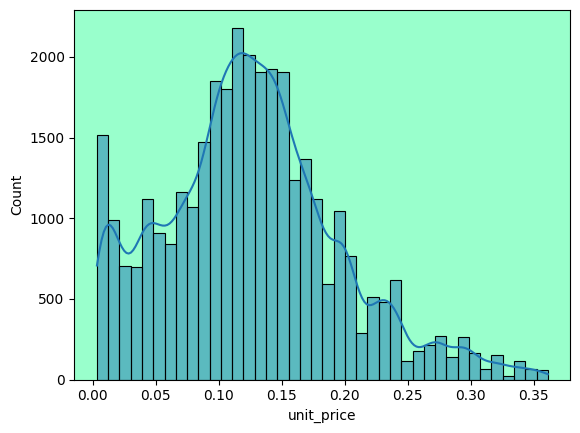

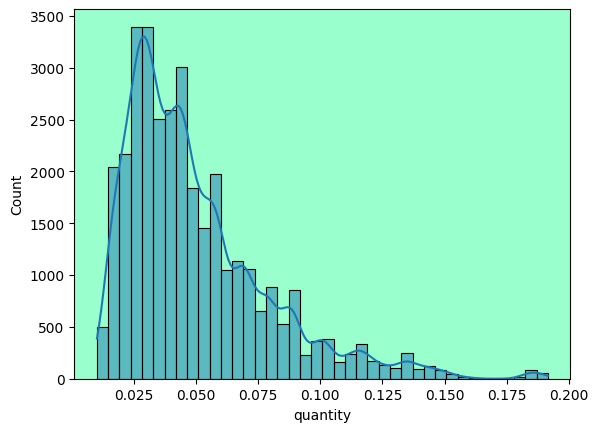

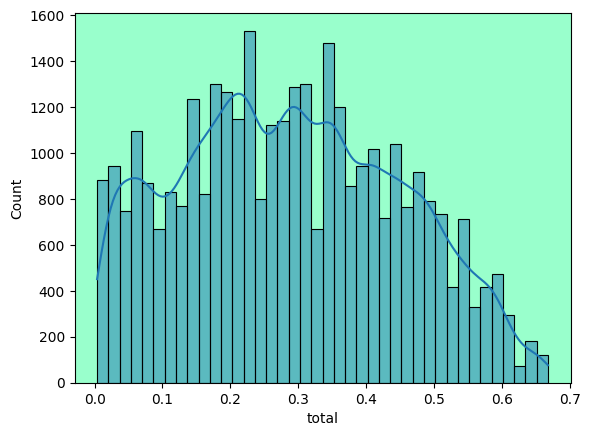

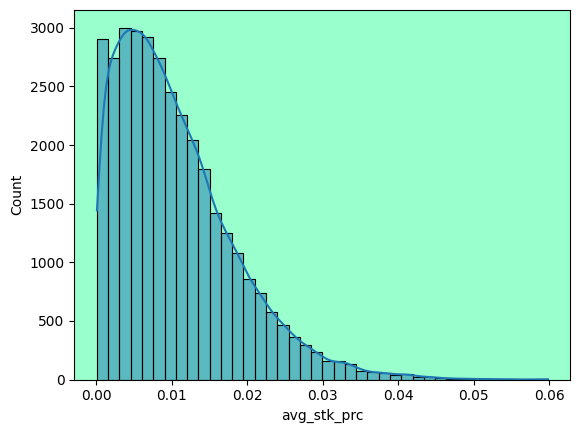

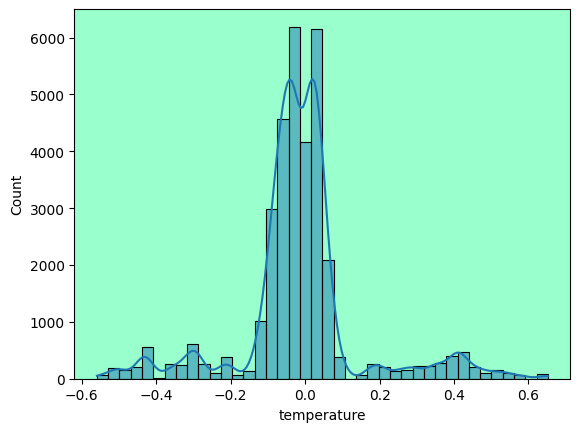

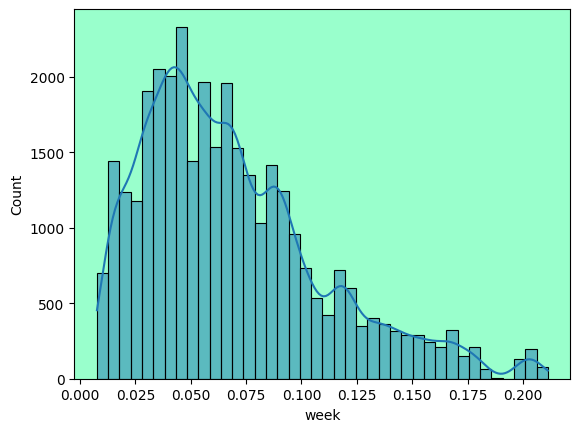

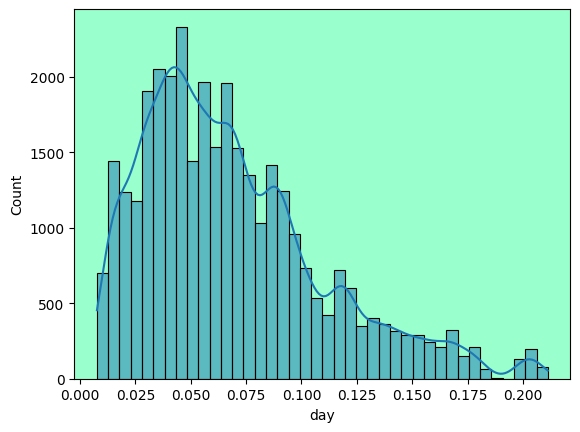

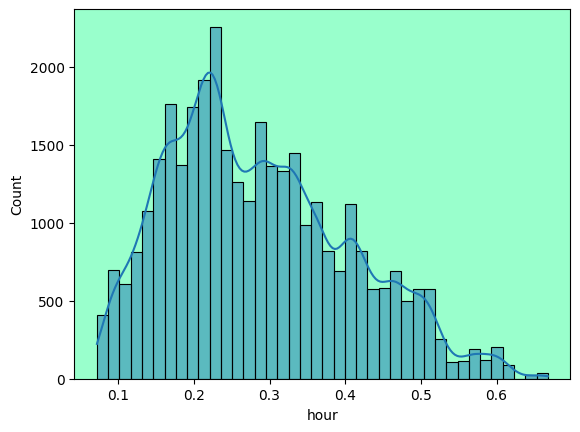

In [340]:
for i in f:
    sns.histplot(data=cdf,x=cdf[i],kde=True,bins=40)
    plt.show()

In [341]:
cat=cdf.select_dtypes(include='object').columns
cat

Index(['category', 'customer_type', 'payment_type'], dtype='object')

In [342]:
for i in cat:
    print("**************************")
    print(f'Nuniques of :         {i}',cdf[i].nunique())
    print()
    print(cdf[i].value_counts().sort_values(ascending=False))
    

**************************
Nuniques of :         category 22

category
fruit                    6081
vegetables               4287
dairy                    2503
meat                     2066
canned foods             2016
refrigerated items       1873
packaged foods           1480
kitchen                  1372
seafood                  1305
cheese                   1195
baked goods              1165
baby products            1156
medicine                 1132
pets                     1001
beverages                 915
cleaning products         790
personal care             772
baking                    748
snacks                    710
frozen                    677
condiments and sauces     388
spices and herbs          292
Name: count, dtype: int64
**************************
Nuniques of :         customer_type 5

customer_type
non-member    7801
premium       7273
gold          7046
basic         6000
standard      5804
Name: count, dtype: int64
**************************
Nuniques of :  

In [343]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
cdf['category']=le.fit_transform(cdf['category'])


In [344]:
cdf=pd.get_dummies(cdf,columns=['customer_type','payment_type'])
cdf

,category,unit_price,quantity,total,avg_stk_prc,temperature,week,day,hour,customer_type_basic,customer_type_gold,customer_type_non-member,customer_type_premium,customer_type_standard,payment_type_cash,payment_type_credit card,payment_type_debit card,payment_type_e-wallet
69,10,0.057057,0.057200,0.228228,0.003575,0.425139,0.014300,0.014300,0.200200,False,False,False,True,False,False,False,False,True
70,10,0.057073,0.057216,0.228294,0.003290,0.425261,0.014304,0.014304,0.200257,False,False,False,True,False,False,False,False,True
71,10,0.056612,0.056754,0.226447,0.011351,0.421822,0.014188,0.014188,0.198638,False,False,False,True,False,False,False,False,True
72,10,0.056620,0.056762,0.226479,0.011210,0.421882,0.014190,0.014190,0.198666,False,False,False,True,False,False,False,False,True
73,10,0.056564,0.056705,0.226255,0.012192,0.421463,0.014176,0.014176,0.198469,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38891,6,0.224350,0.026410,0.448699,0.004490,-0.031956,0.052819,0.052819,0.158458,False,False,False,True,False,True,False,False,False
38892,6,0.224379,0.026413,0.448759,0.004358,-0.031960,0.052826,0.052826,0.158479,False,False,False,True,False,True,False,False,False
38893,6,0.224320,0.026406,0.448640,0.004621,-0.031951,0.052812,0.052812,0.158437,False,False,False,True,False,True,False,False,False
38894,6,0.224587,0.026438,0.449174,0.003437,-0.031989,0.052875,0.052875,0.158625,False,False,False,True,False,True,False,False,False


In [345]:
cdf.columns

Index(['category', 'unit_price', 'quantity', 'total', 'avg_stk_prc',
       'temperature', 'week', 'day', 'hour', 'customer_type_basic',
       'customer_type_gold', 'customer_type_non-member',
       'customer_type_premium', 'customer_type_standard', 'payment_type_cash',
       'payment_type_credit card', 'payment_type_debit card',
       'payment_type_e-wallet'],
      dtype='object')

In [346]:
cols=['category', 'unit_price', 'quantity', 'total', 'avg_stk_prc',
       'temperature', 'week', 'day', 'hour', 'customer_type_basic',
       'customer_type_gold', 'customer_type_non-member',
       'customer_type_premium', 'customer_type_standard', 'payment_type_cash',
       'payment_type_credit card', 'payment_type_debit card',
       'payment_type_e-wallet']

In [347]:
cdf.select_dtypes(include=['object','category']).columns

Index([], dtype='object')

In [348]:
y=cdf.avg_stk_prc
x=cdf.drop(columns='avg_stk_prc')

In [349]:
from sklearn.feature_selection import mutual_info_regression
d=['cus_gold', 'cus_non-member',
       'cus_premium', 'cus_standard', 'pymode_credit card',
       'pymode_debit card', 'pymode_e-wallet']
mi=mutual_info_regression(x,y,discrete_features='auto')

In [350]:
miscores=mi.tolist()
ms=pd.DataFrame({'features':x.columns,'MutualInformation Scores':miscores})
ms

,features,MutualInformation Scores
0,category,0.338093
1,unit_price,0.507509
2,quantity,0.635673
3,total,0.504009
4,temperature,0.434219
5,week,0.549388
6,day,0.550059
7,hour,0.565502
8,customer_type_basic,0.062283
9,customer_type_gold,0.069122


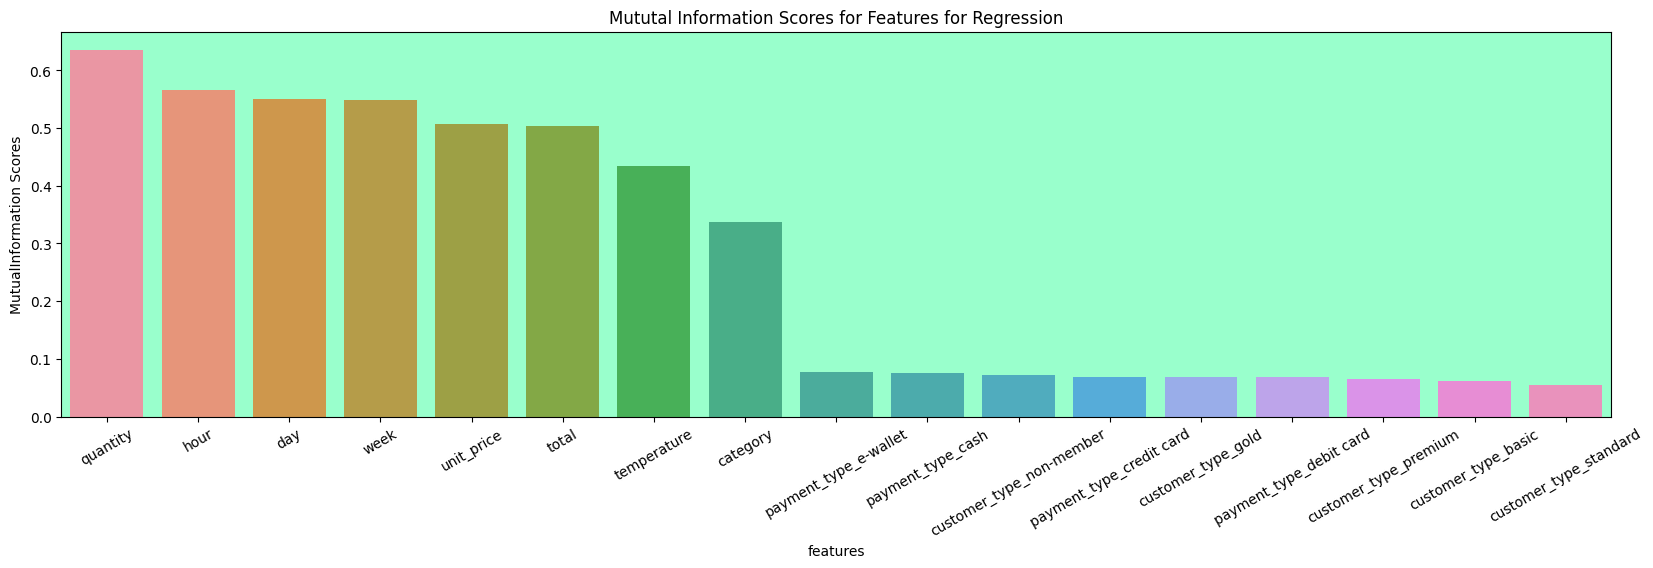

In [351]:
ms=ms.sort_values(by='MutualInformation Scores',ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(data=ms,x='features',y='MutualInformation Scores')
plt.xticks(rotation=30)
plt.title('Mututal Information Scores for Features for Regression')
plt.show()

In [352]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler


In [353]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,shuffle=True,train_size=.80)
print(f"xtrain: {xtrain.shape} and xtest: {xtest.shape}")
print(f"ytrain: {ytrain.shape} and ytest: {ytest.shape}")

xtrain: (27139, 17) and xtest: (6785, 17)
ytrain: (27139,) and ytest: (6785,)


In [354]:
ss=RobustScaler(unit_variance=True)
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

from sklearn.decomposition import PCA

pca=PCA(n_components=8)
xtrain=pca.fit_transform(xtrain)
xtest=pca.fit_transform(xtest)

print(f"Explained Variance: {pca.explained_variance_}")
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

ev=pd.DataFrame({'Components': [f'pca{i}' for i in range(1,len(pca.explained_variance_)+1)],
    'Explained_variance': pca.explained_variance_})
ev

sns.barplot(data=ev,x='Components',y='Explained_variance')

In [355]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression

In [356]:
def Crosval(model):
    rkf=KFold(n_splits=10)
    score=cross_val_score(model,xtrain,ytrain,cv=rkf,scoring='neg_mean_absolute_error',)
    print(f"Mean Score: {score.mean()}\n Standard Deviation-Score: {score.std()}")
    model.fit(xtrain,ytrain)
    
    ypred=model.predict(xtest)
    print(f"MSE: {mean_squared_error(ytest,ypred)}")
    print(f"MAE: {mean_absolute_error(ytest,ypred)}")
    print(f"R^2: {r2_score(ytest,ypred)}")

In [357]:
lr=LinearRegression()
Crosval(lr)

Mean Score: -0.005330324159623068
 Standard Deviation-Score: 6.687674827891295e-05
MSE: 4.518049815973185e-05
MAE: 0.005282862830013132
R^2: 0.2568945790485252


In [358]:
from sklearn.ensemble import AdaBoostRegressor,HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')


In [369]:
h=HistGradientBoostingRegressor(loss="squared_error", quantile=None, learning_rate=0.1, max_iter=100,
                                max_leaf_nodes=40, max_depth=100, 
                                min_samples_leaf=50, l2_regularization=0, max_bins=255, categorical_features=None,
                                monotonic_cst=None, interaction_cst=None,
                                warm_start=False, early_stopping="auto", scoring="loss", validation_fraction=0.25,
                                n_iter_no_change=10, tol=1e-7, verbose=0, random_state=None)
Crosval(h)

Mean Score: -0.0031992994765462517
 Standard Deviation-Score: 4.0602777411995817e-05
MSE: 2.9128553653840177e-05
MAE: 0.004303318022067629
R^2: 0.5209086440765134
